In [1]:
import numpy as np
import pandas as pd

In [2]:
#loading dataset
df = pd.read_csv('diabetes.csv')

# Exploratory Data Analysis (EDA)

In [3]:
# Returns number of rows and columns of the dataset
df.shape

(2000, 9)

In [4]:
# Returns an object with all of the column headers 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Returns the first x number of rows when head(num). Without a number it returns 5
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [8]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [9]:
# Returns true for a column having null values, else false
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [11]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

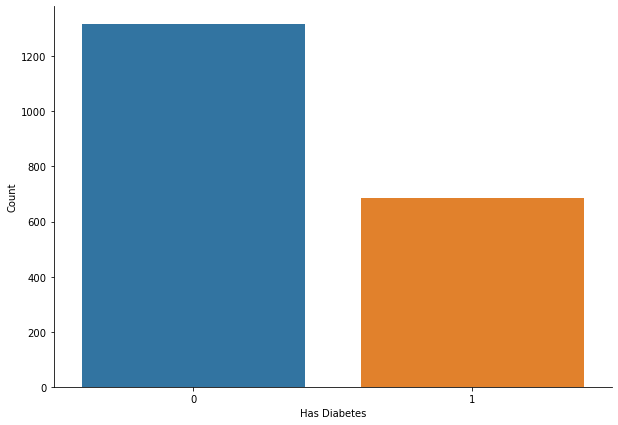

In [12]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

In [13]:
df_copy = df.copy(deep=True)
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [14]:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

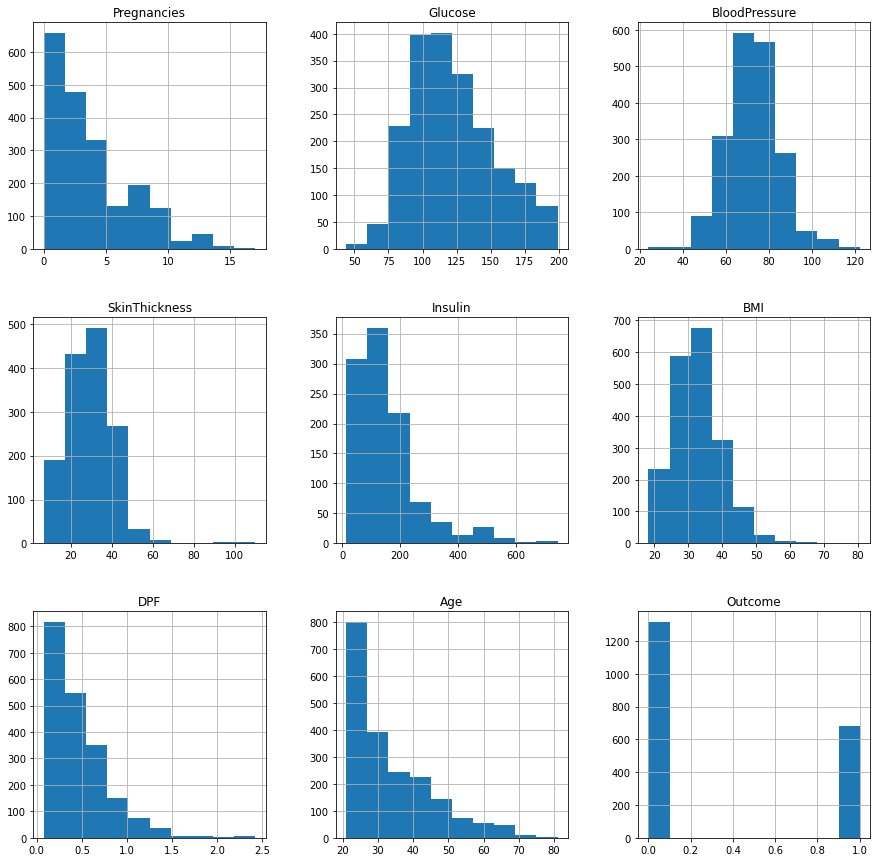

In [15]:
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

In [16]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

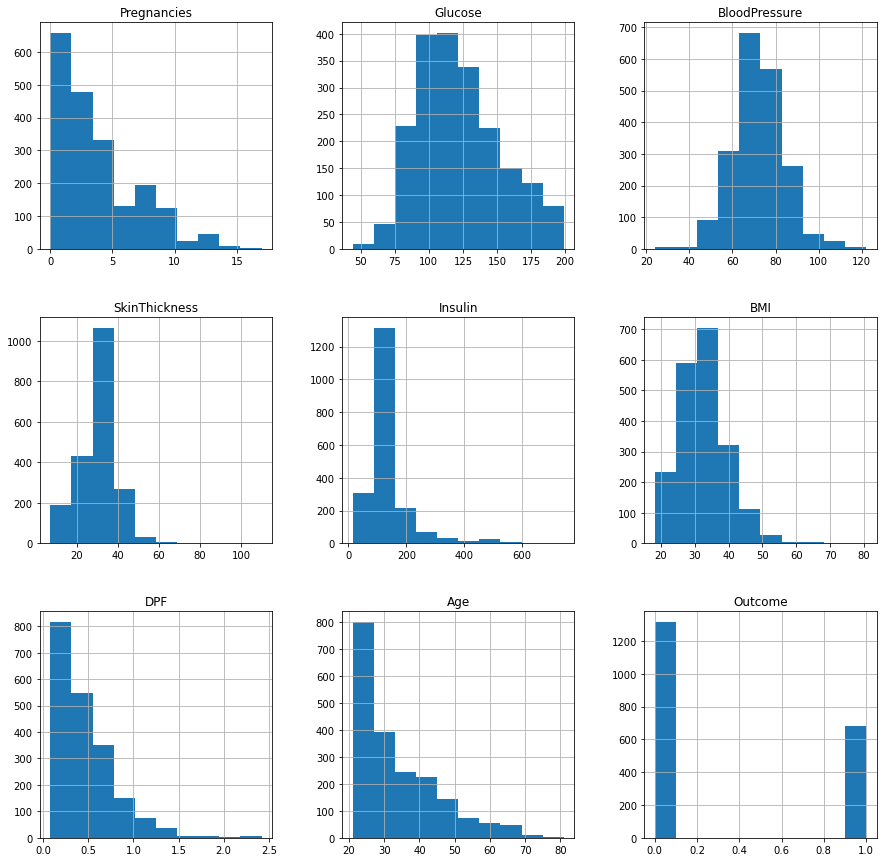

In [17]:
# Plotting histogram of dataset after replacing NaN values
p=df_copy.hist(figsize=(15,15))

In [18]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [19]:
#To find co-relation among features
corrmat=df_copy.corr()
corrmat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.121537,0.197878,0.085273,0.024955,0.011371,-0.025453,0.539457,0.224437
Glucose,0.121537,1.000000,0.199323,0.207537,0.406703,0.232986,0.124141,0.259805,0.488020
BloodPressure,0.197878,0.199323,1.000000,0.201330,0.048169,0.259221,0.012074,0.323335,0.174481
SkinThickness,0.085273,0.207537,0.201330,1.000000,0.179522,0.519510,0.094401,0.129422,0.204668
Insulin,0.024955,0.406703,0.048169,0.179522,1.000000,0.203693,0.125062,0.051408,0.197486
BMI,0.011371,0.232986,0.259221,0.519510,0.203693,1.000000,0.142019,0.018652,0.282421
DPF,-0.025453,0.124141,0.012074,0.094401,0.125062,0.142019,1.000000,0.026569,0.155459
Age,0.539457,0.259805,0.323335,0.129422,0.051408,0.018652,0.026569,1.000000,0.236509
Outcome,0.224437,0.488020,0.174481,0.204668,0.197486,0.282421,0.155459,0.236509,1.000000


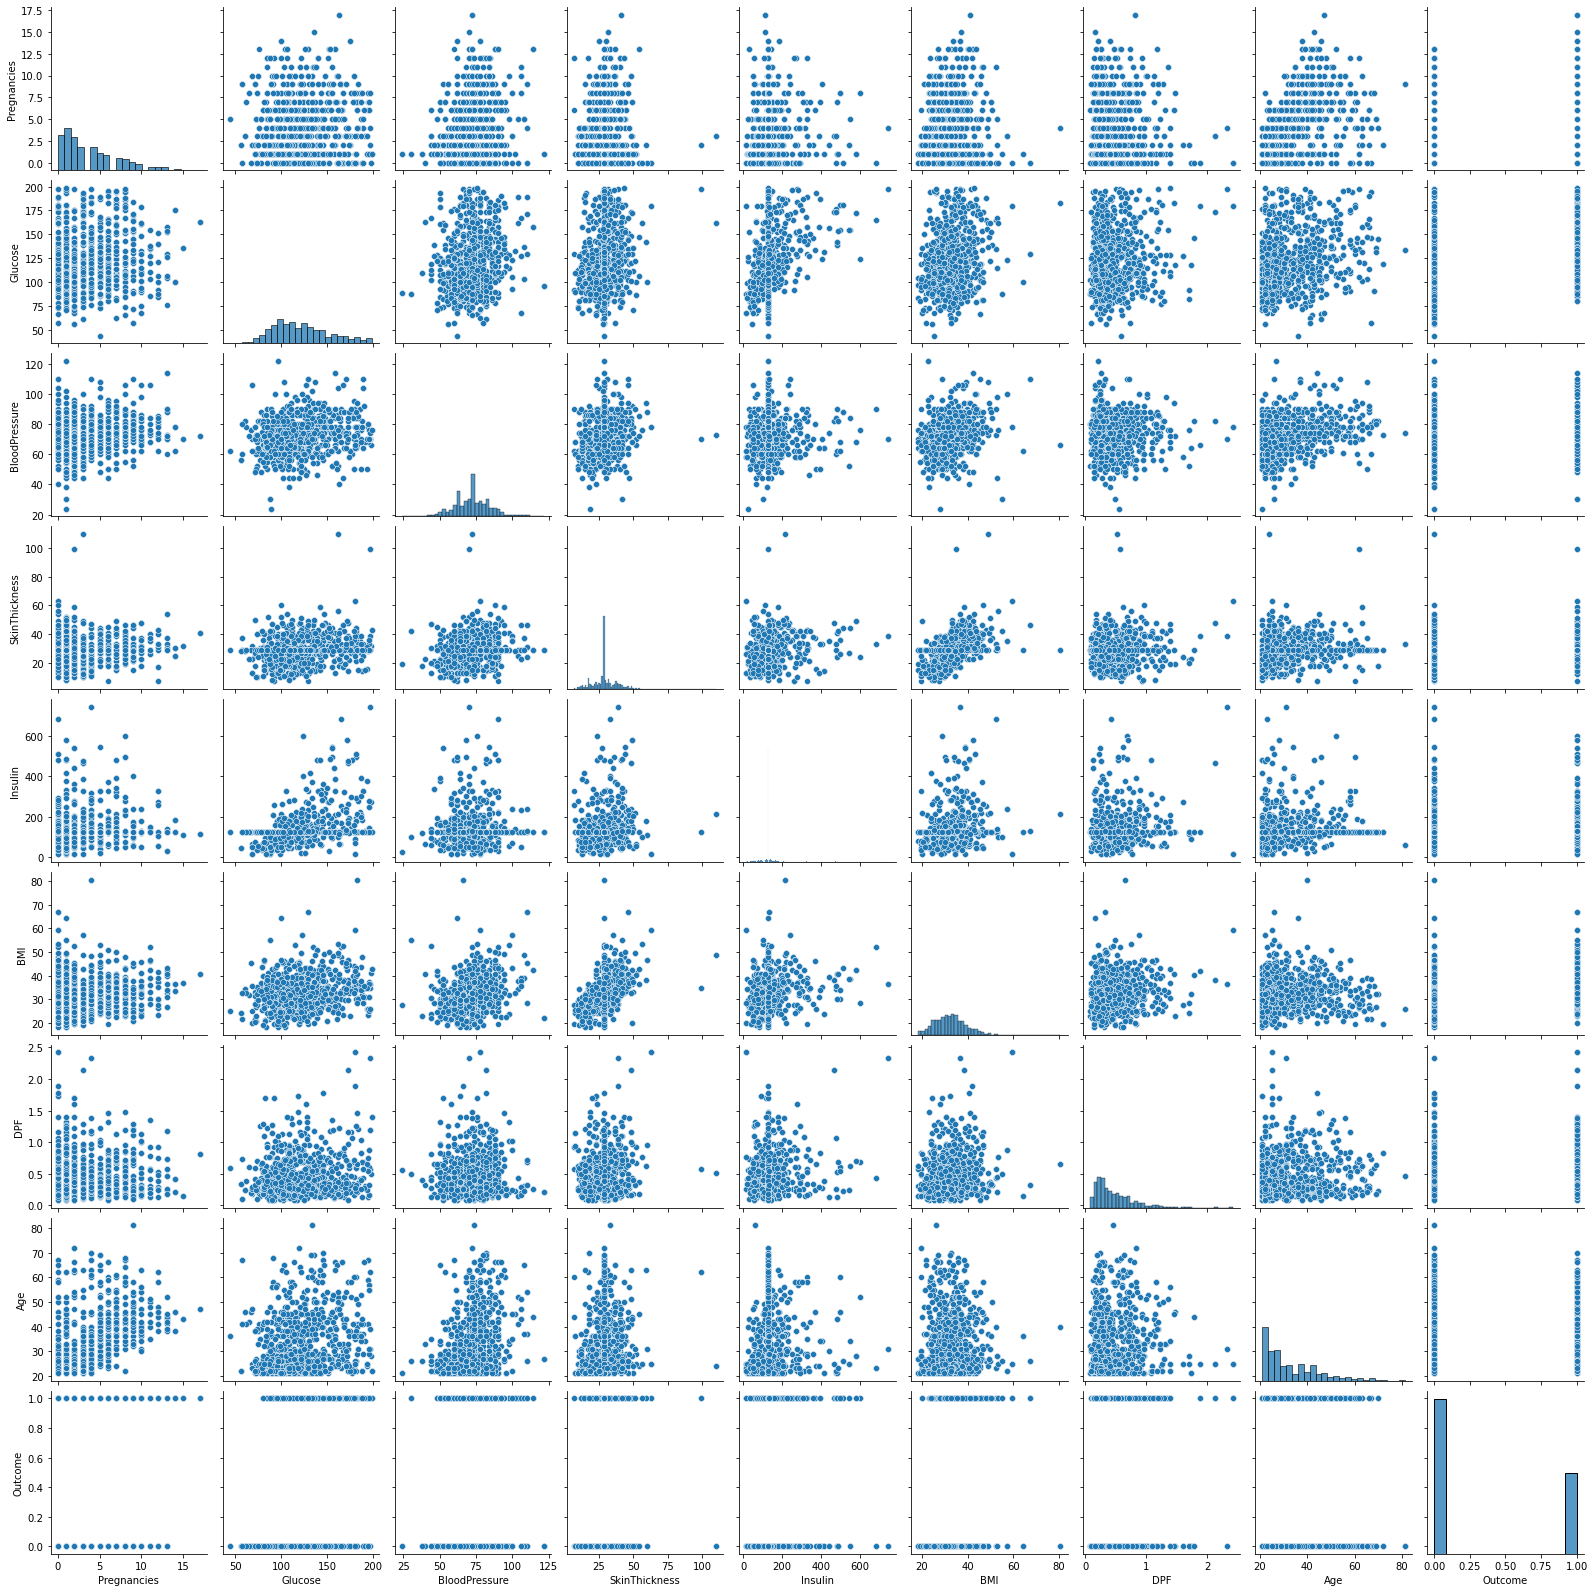

In [20]:
#Plot pairwise relationships in a dataset.

sns.pairplot(df_copy)


<AxesSubplot:>

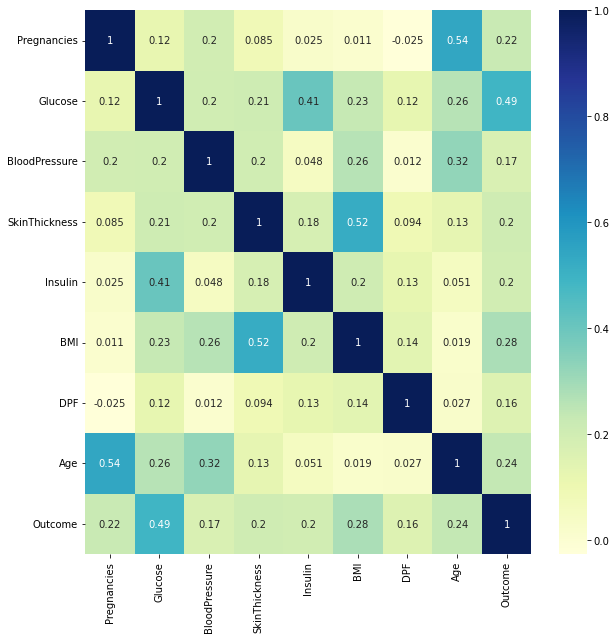

In [21]:
#plot heat map
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True,cmap="YlGnBu")

In [22]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0


In [23]:
#independent and dependent features
x=df_copy.iloc[:,:-1]
y=df_copy.iloc[:,-1]

In [24]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21


In [25]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [26]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [27]:
print(model.feature_importances_)

[0.10039791 0.29259712 0.08888264 0.06965793 0.0767883  0.13401063
 0.10088399 0.13678148]


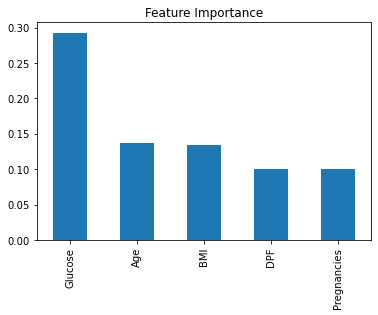

In [28]:
fi=pd.Series(model.feature_importances_,index=x.columns)
fi.nlargest().plot(kind="bar")
plt.title("Feature Importance")
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
x_train.shape


(1600, 8)

In [31]:
x_test.shape


(400, 8)

In [32]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier()

In [33]:
# Hyperparameters by RandomizedSearchCV

#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#number of features to consider at every split
max_features=['auto','sqrt']

#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]


In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
# creat the random grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth
            }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30]}


In [36]:
rf_random = RandomizedSearchCV(estimator = model_rfc, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [37]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .max_depth=25, max_features=sqrt, n_estimators=1000; total time=   2.9s
[CV] END .max_depth=25, max_features=sqrt, n_estimators=1000; total time=   2.5s
[CV] END .max_depth=25, max_features=sqrt, n_estimators=1000; total time=   2.9s
[CV] END .max_depth=25, max_features=sqrt, n_estimators=1000; total time=   2.6s
[CV] END .max_depth=25, max_features=sqrt, n_estimators=1000; total time=   2.6s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=800; total time=   1.6s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=800; total time=   1.7s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=800; total time=   1.7s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=800; total time=   1.7s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=800; total time=   1.9s
[CV] END .max_depth=20, max_features=auto, n_estimators=1100; total time=   2.9s
[CV] END .max_depth=20, max_features=auto, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
predictions=rf_random.predict(x_test)

In [39]:
predictions

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,

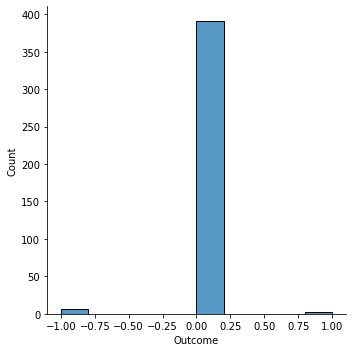

In [40]:
sns.displot(y_test-predictions)

# Model evaluation

In [41]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = rf_random.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[263,   7],
       [  2, 128]], dtype=int64)

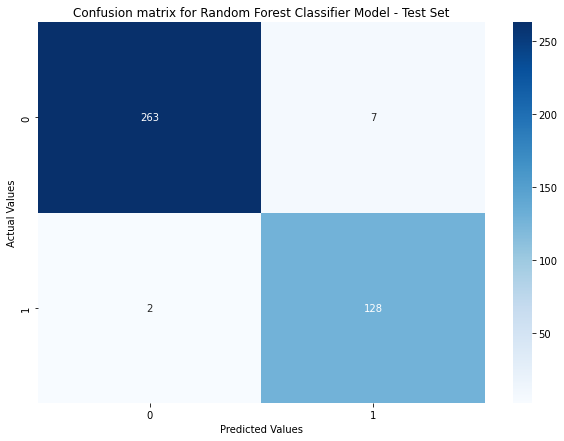

In [42]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [43]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 97.75%


In [44]:
# Creating a confusion matrix for training set
y_train_pred = rf_random.predict(x_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[1046,    0],
       [   0,  554]], dtype=int64)

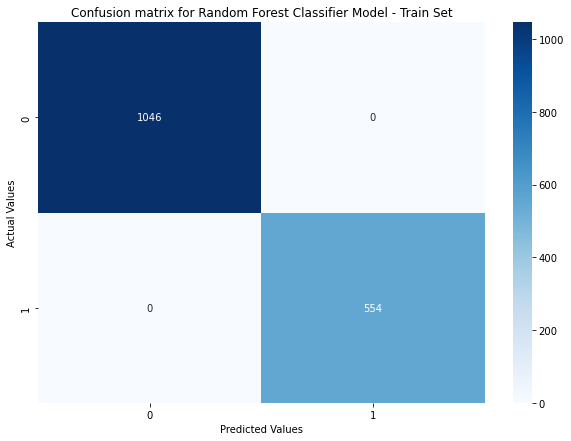

In [45]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [46]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_classifier_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)